# Python Foundations: DoorDash Exploratory Data Analysis (EDA)

### Context

**DoorDash**, a leading food delivery platform, has rapidly risen to ubiquity by revolutionizing the way consumers access their favorite restaurants. Through its user-friendly app, **DoorDash** provides customers with a seamless online ordering experience, connecting them with a vast network of local eateries. Simultaneously, the platform streamlines operations for restaurants by handling the intricate logistics of order fulfillment and delivery, facilitated by a fleet of dedicated drivers who ensure hot meals are transported efficiently from the kitchen to the customer's doorstep.

The app allows customers to place online orders directly with restaurants. Once an order is confirmed, **DoorDash** assigns a delivery person to pick up the food from the restaurant. The delivery person uses a map to navigate to the restaurant, collects the packaged food order, and then travels to the customer's location to complete the delivery. After successful delivery, customers can rate their experience through the app. **DoorDash** generates revenue by collecting a fixed commission from the restaurants for each delivery order facilitated through their platform.

### Objective

**DoorDash** stores extensive metadata from the different orders made by customers. The company wants to analyze this metadata to better understand demand trends of different restaurants and customer demographics. Exploratory Data Analysis will allow **DoorDash** to optimize customer experience by better understanding customer spending trends and making corresponding improvements to the business.

### Data Dictionary

* `order_id`: Unique ID of the order
* `customer_id`: ID of the customer who ordered the food
* `restaurant_name`: Name of the restaurant
* `cuisine_type`: Type of cuisine ordered by the customer
* `cost`: Cost of the order
* `day_of_the_week`: Indicates whether the order is placed on a **weekday** or **weekend** (The **weekday is from Monday to Friday** and the **weekend is Saturday and Sunday**)
* `rating`: Rating given by the customer (x stars out of 5)
* `food_preparation_time`: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation
* `delivery_time`: Time (in minutes) taken by the delivery person to deliver the order. This is calculated by taking the difference between the timestamps of the delivery person's pick-up and drop-off confirmations

### Import Necessary Libraries

In [1]:
# import libraries for data manipulation

import numpy as np
import pandas as pd

# import libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

### Understanding the Structure of the Data

In [2]:
# Read the data

df = pd.read_csv('DoorDash Metadata.csv')

# Returns the first 5 rows

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [3]:
# Use shape function to determine shape of data

total_rows, total_columns = df.shape

# Display the result

print("Total Rows:", total_rows)
print("Total Columns:", total_columns)

Total Rows: 1898
Total Columns: 9


#### Observations: 
**1898 rows and 9 columns are present in the data**. When I call the shape function on my dataframe "df", it returns a tuple "total_rows, total_columns" where "total_rows" is the number of individual rows and "total_columns" is the number of columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are **4 object columns**, **4 integer columns (int64)**, and **1 floating point column (float64)**.

When I call the info function, it returns an overview of my DataFrame that includes dtypes and the number of columns corresponding to each dtype (e.g. int64(4), object(4), etc.).

In [5]:
# Use the isnull function to detect missing values in DataFrame and use the sum function to total the missing values

missing_values = df.isnull().sum()
missing_values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Using the isnull and sum functions allows me to determine that **there are no missing values in the data**. 

In [6]:
min_preparation_time = df['food_preparation_time'].min()

avg_preparation_time = df['food_preparation_time'].mean()

max_preparation_time = df['food_preparation_time'].max()

print("Minimum Food Preparation Time (Minutes):", min_preparation_time)
print(f"Average Food Preparation Time (Minutes): {avg_preparation_time:.0f}") # use formatting to avoid outputting decimal places
print("Maximum Food Preparation Time (Minutes):", max_preparation_time)

Minimum Food Preparation Time (Minutes): 20
Average Food Preparation Time (Minutes): 27
Maximum Food Preparation Time (Minutes): 35


#### Observations:
Using the min, mean, and max functions allows me to determine that the **minimum food preparation time is 20 minutes**, the **average food preparation time is 27 minutes**, and the **maximum food preparation time is 35 minutes**.

In [7]:
# Use the sum function to total the number of "Not given" ratings in the rating column

unrated_orders = (df['rating'] == 'Not given').sum()

# Display the result

print("Unrated Orders:", unrated_orders)

Unrated Orders: 736


#### Observations:
My variable "unrated_orders" displays the sum total of all cells without the text field "Not given" in the "rating" column. I have determined that **736 orders are unrated** in our dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [8]:
# Calculate and display the number of relevant unique values in our dataset by column

unique_order_ids = df['order_id'].nunique()
unique_customer_ids = df['customer_id'].nunique()
unique_restaurant_names = df['restaurant_name'].nunique()
unique_cuisine_types = df['cuisine_type'].nunique()
unique_ratings = df['rating'].nunique()
unique_day_of_the_week = df['day_of_the_week'].nunique()

print(f"Total Orders: {unique_order_ids}")
print(f"Total Customers: {unique_customer_ids}")
print(f"Total Restaurants: {unique_restaurant_names}")
print(f"Total Cuisines: {unique_cuisine_types}")
print(f"Total Ratings: {unique_ratings}")
print(f"Total Days of the Week: {unique_day_of_the_week}")

Total Orders: 1898
Total Customers: 1200
Total Restaurants: 178
Total Cuisines: 14
Total Ratings: 4
Total Days of the Week: 2


#### Observations:
Using the nunique function, I have determined that there are **1898 total orders**, **1200 total unique customers**, **178 unique restaurants**, **14 unique cuisines**, **4 unique ratings**, and **2 unique times of week**.

In [9]:
# Use describe function to display greater statistical insight about dataset

df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
The describe function gives me a concise view of data points relevant to our dataset.

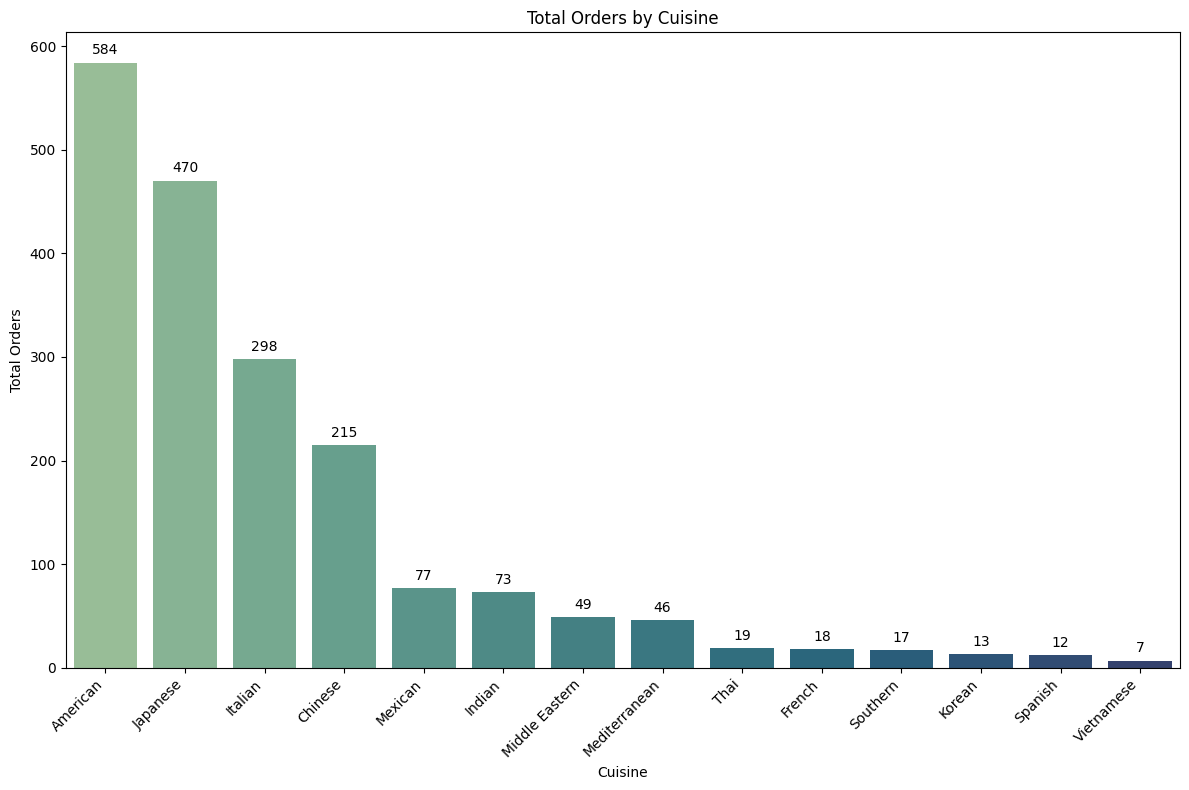

In [10]:
# Display a count plot with the 14 unique values in the "cuisine_type" column

plt.figure(figsize=(12, 8))

ax = sns.countplot(x= 'cuisine_type', data=df, order = df['cuisine_type'].value_counts().index, palette="crest")

plt.xticks(rotation=45, ha='right')
plt.title('Total Orders by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')

# Add number totals above the bar for each class

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:
This countplot demonstrates the total orders by cuisine type. **American (584 orders)**, **Japanese (470 orders)**, **Italian (298 orders)**, and **Chinese (215 orders)** cuisines are significantly more popular than the other 10 cuisines in our dataset. 

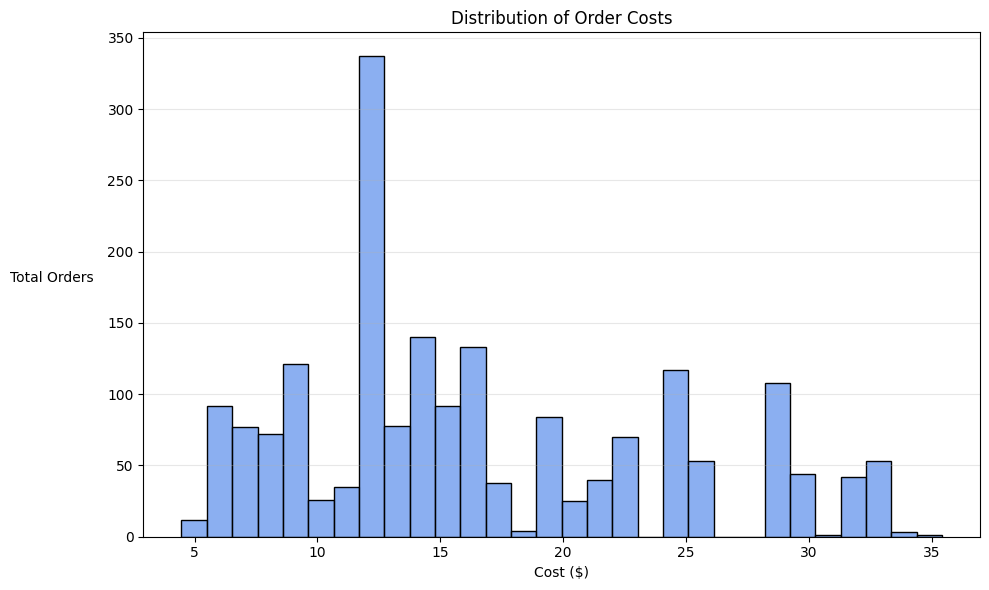

In [11]:
# Display a histogram with the distribution of values in the "cost_of_the_order" column

plt.figure(figsize=(10, 6))

sns.histplot(df['cost_of_the_order'], bins=30, color='cornflowerblue', edgecolor='black')

plt.title('Distribution of Order Costs')
plt.xlabel('Cost ($)')
plt.ylabel('Total Orders', labelpad=40, rotation=0)
plt.grid(axis='y', alpha=0.30) # Add x-axis grid to increase data legibility

plt.tight_layout()
plt.show()

#### Observations:
This histogram demonstrates the distribution of order costs by total orders. **This distribution appears to be right-skewed** meaning more orders with lower cost and less orders with higher cost. The **majority of the orders appear to be below \\$20**.

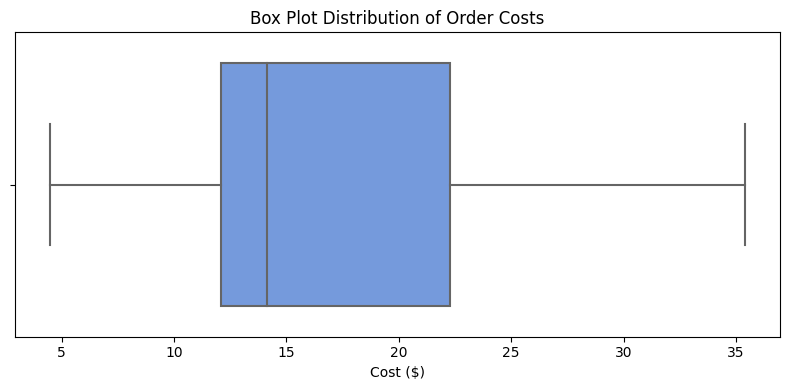

In [12]:
# Display a box plot with the distribution of values in the "cost_of_the_order" column

plt.figure(figsize=(8, 4))

sns.boxplot(x='cost_of_the_order', data=df, color='cornflowerblue')

plt.title('Box Plot Distribution of Order Costs')
plt.xlabel('Cost ($)')

plt.tight_layout()
plt.show()

#### Observations:
This box plot demonstrates the distribution of order costs. Its **median** (measure of central tendency) **cost is \\$14.14**. The **Q1 (25th percentile) cost is \\$12.08**. The **Q3 (75th percentile) cost is \\$22.30**. The **left whisker (minimum) cost is \\$4.47**. The **right whisker (maximum) cost is \\$35.41**. The **average (mean) cost is \\$16.50**.

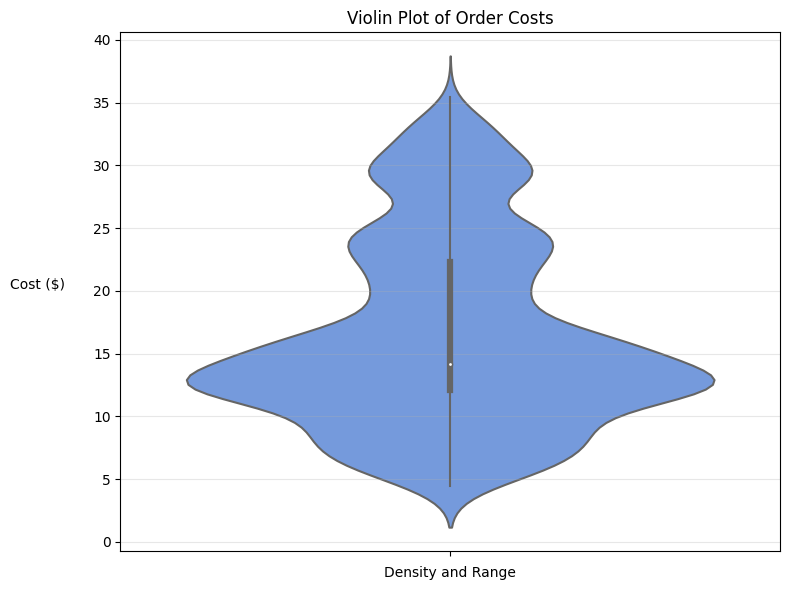

In [13]:
# Display a violin plot with the distribution of density and range in the "cost_of_the_order" column

plt.figure(figsize=(8, 6))

sns.violinplot(y='cost_of_the_order', data=df, color='cornflowerblue')

plt.title('Violin Plot of Order Costs')
plt.xlabel('Density and Range')
plt.ylabel('Cost ($)', labelpad=40, rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Observations:
This violin plot demonstrates the distribution of density and range of order costs. The **median at //$14.14** is visible and it is clear that the density and shape around the median indicates that that the **majority of the total orders are between \\$10 to \\$15**.

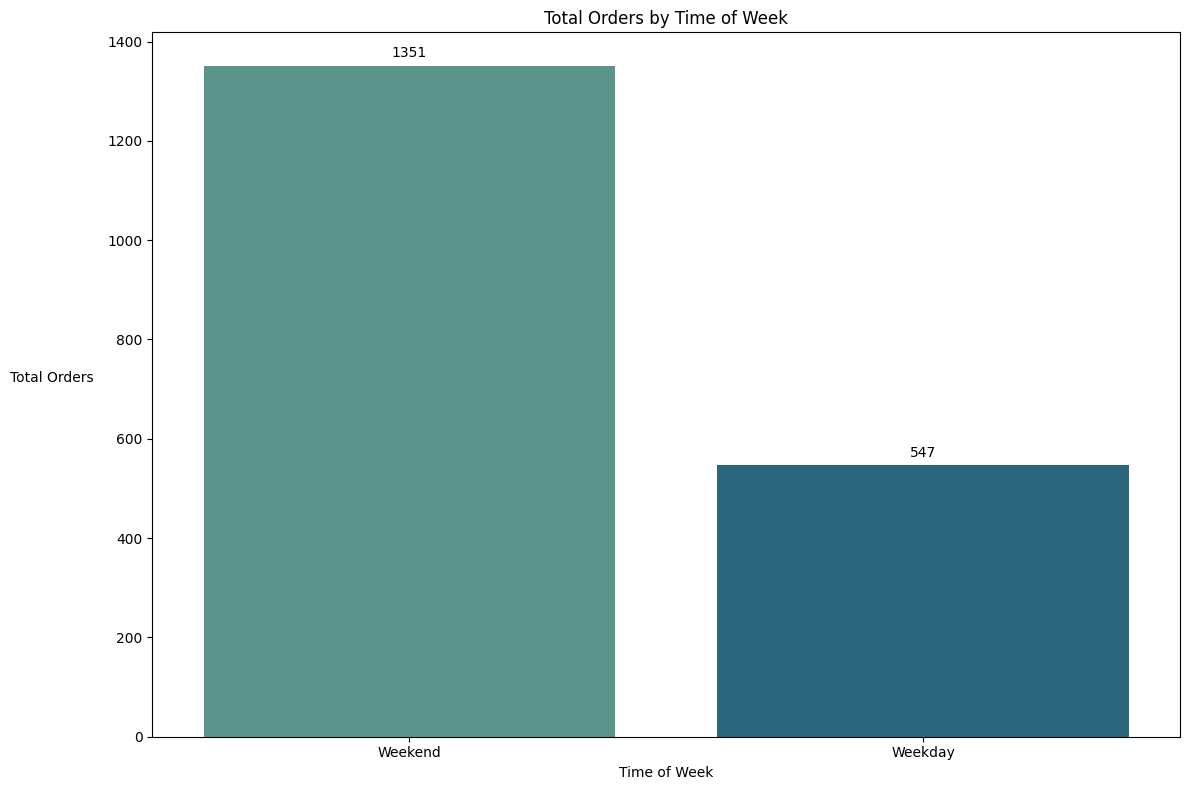

In [14]:
# Display a count plot with the two unique values in the "day_of_the_week" column

plt.figure(figsize=(12, 8))

ax = sns.countplot(x='day_of_the_week', data=df, order = df['day_of_the_week'].value_counts().index, palette="crest")

plt.title('Total Orders by Time of Week')
plt.xlabel('Time of Week')
plt.ylabel('Total Orders', labelpad=40, rotation=0)

# Add number totals above the bar for each class

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:
This count plot demonstrates total numbers of orders by time of week. We can see that there are **significantly more orders placed on the weekend than on weekdays**. There are **1,351 orders placed on the weekend** and **547 orders placed on weekdays**.

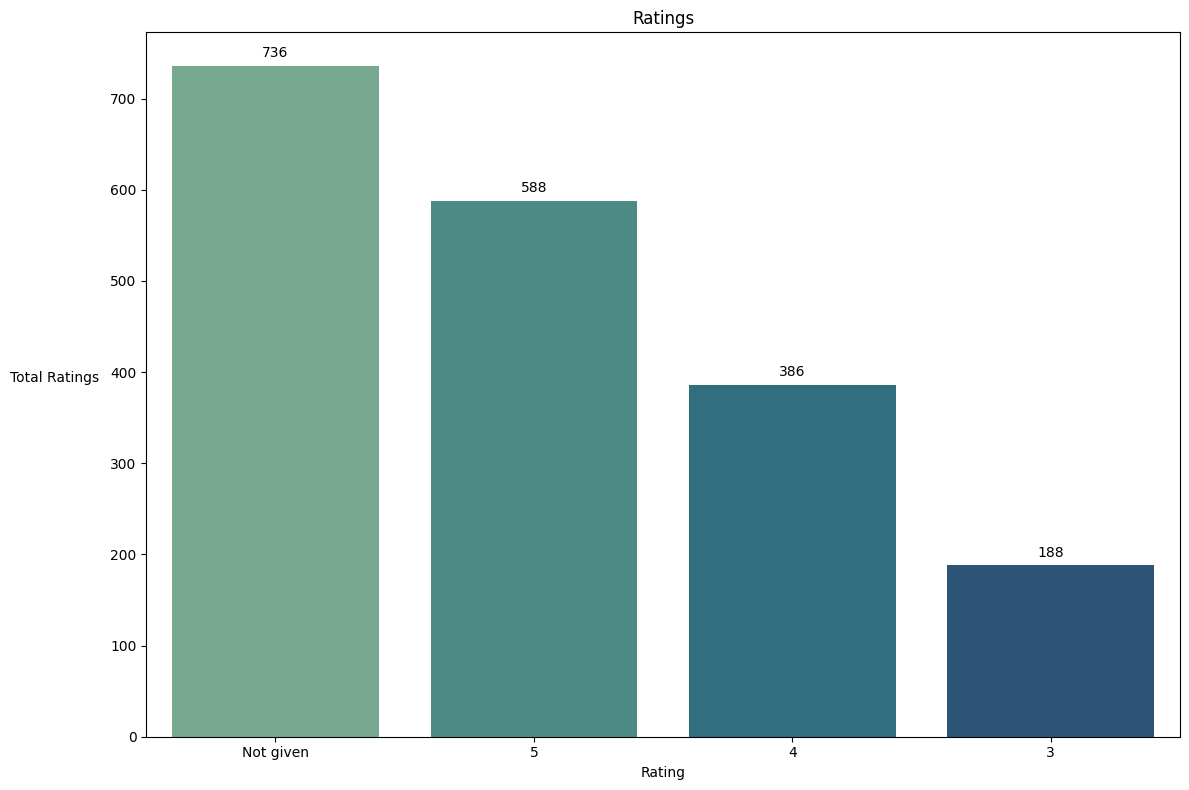

In [15]:
# Display a count plot with the 4 unique values in the "rating" column

plt.figure(figsize=(12, 8))

ax = sns.countplot(x='rating', data=df, order = df['rating'].value_counts().index, palette="crest")

plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Total Ratings', labelpad=40, rotation=0)

# Add number totals above the bar for each class

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()    
plt.show()

#### Observations:
This count plot demonstrates total ratings given to each order. It is **important to note that the "Not given" column represents the largest amount of orders**. This could be problematic because it does not provide an explicit measure of customer sentiment with their order. 

There are **736 ratings of "Not given,"** **588 ratings of "5,"** **386 ratings of "4,"** and **188 ratings of "3."**

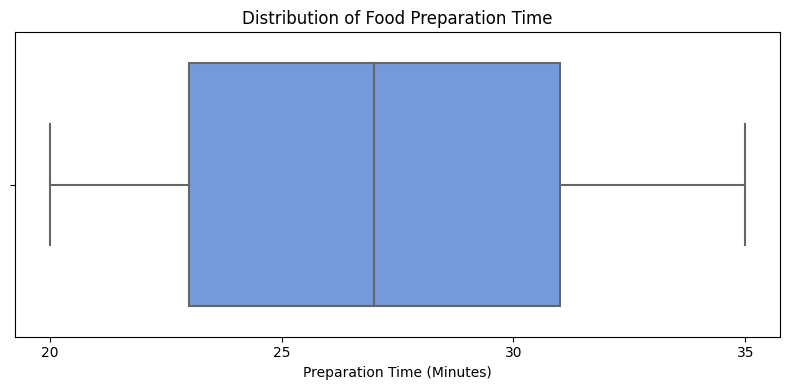

In [16]:
# Display a box plot with the distribution of values in the "food_preparation_time" column

plt.figure(figsize=(8, 4))

ax = sns.boxplot(x='food_preparation_time', data=df, color='cornflowerblue')

plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (Minutes)')
plt.xticks(ticks=[20, 25, 30, 35], labels=[20, 25, 30, 35]) # Display x-axis ticks closer to the "food_preparation_time" values to increase legibility

plt.tight_layout()    
plt.show()

#### Observations:
This box plot demonstrates distribution of food preparation time by orders. The **average (mean)** and **median time** are **almost the same at 27.37 and 27 minutes respectively**. The **Q1 (25th percentile) time is 23 minutes**. The **Q3 (75th percentile) time is 31 minutes**. The **left whisker (minimum) time is 20 minutes**. The **right whisker (maximum) time is 35 minutes**.

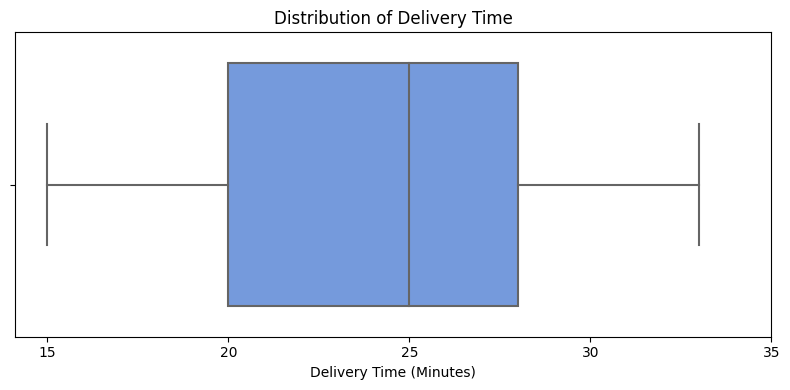

In [17]:
# Display a box plot with the the distribution of values in the "food_preparation_time" column

plt.figure(figsize=(8, 4))

sns.boxplot(x='delivery_time', data=df, color='cornflowerblue')

plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.xticks(ticks=[15, 20, 25, 30, 35], labels=[15, 20, 25, 30, 35])

plt.tight_layout()
plt.show()

#### Observations:
This box plot demonstrates distribution of food preparation time by orders. The **average (mean) and median time** are **close at 24 and 25 minutes respectively**. The **Q1 (25th percentile) time is 20 minutes**. The **Q3 (75th percentile) time is 28**. The **left whisker (minimum) time is 15 minutes**. The **right whisker (maximum) time is 33 minutes**.

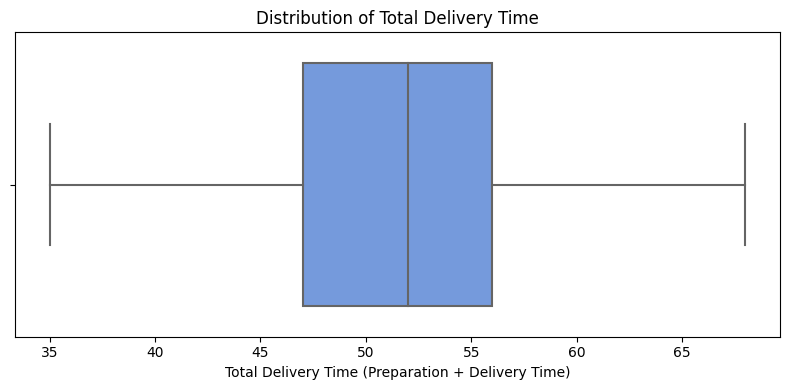

In [18]:
# Calculate the total time (food preparation time + delivery time)

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Create box plot to demonstrate the with the the distribution of values in the new "total_time" column

plt.figure(figsize=(8, 4))

sns.boxplot(x='total_time', data=df, color='cornflowerblue')

plt.title('Distribution of Total Delivery Time')
plt.xlabel('Total Delivery Time (Preparation + Delivery Time)')

plt.tight_layout()
plt.show()

#### Observations:
This box plot demonstrates distribution of total delivery time by orders. The **average (mean) and median time** are **almost the same at 51.53 and 52 minutes respectively**. The **Q1 (25th percentile) time is 47 minutes**. The **Q3 (75th percentile) time is 56 minutes**. The **left whisker (minimum) time is 35 minutes**. The **right whisker (maximum) time is 68 minutes**.

In [19]:
# Group by unique values in the "restaurant_name" column and count the number of orders for each restaurant

order_counts = df['restaurant_name'].value_counts()

# Select the top 5 restaurants with the most orders

top_5_restaurants = order_counts.head(5)

# Display the result

print(top_5_restaurants)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The top 5 restaurants in terms of the numbers of orders received are **Shake Shack (219 orders)**, **The Meatball Shop (132 orders)**, **Blue Ribbon Sushi (119 orders)**, **Blue Ribbon Fried Chicken (96 orders)**, and **Parm (86 orders)**.

Shake Shack and Blue Ribbon Fried Chicken are American cuisine, Parm and The Meatball Shop are Italian cuisine, and Blue Ribbon Sushi is Japanese cuisine. This makes sense considering these 3 cuisine types are the top 3 most-ordered cuisines in our dataset.

In [20]:
# Filter the DataFrame for orders made on the Weekend

weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Count the number of orders for each cuisine type during the weekend

weekend_order_counts = weekend_orders['cuisine_type'].value_counts()

# Determine the most popular cuisine type using idxmax

most_popular_cuisine = weekend_order_counts.idxmax()

# Display the result

print("Most Popular Cuisine On Weekends:", most_popular_cuisine)

Most Popular Cuisine On Weekends: American


#### Observations:
By filtering the DataFrame by "Weekend," counting those total values with value_counts, and applying idxmax, I have determined that **American food is the most popular cuisine on weekends in our dataset**.

In [21]:
# Create a variable "orders_over_20" for orders with cost greater than $20

orders_over_20 = df['cost_of_the_order'] > 20

# Calculate the percentage of such orders by utilizing the len function and multiplying by 100

percentage = (orders_over_20.sum() / len(df)) * 100

# Display the result

print(f"Percentage of Orders Over $20: {percentage:.2f}%") # Format percentage to display up to 2 decimal places for legibility

Percentage of Orders Over $20: 29.24%


#### Observations:
By determining the number of orders with values greater than (but not equal to) 20, dividing that number of orders by the total number of orders, and multiplying by 100, I have determined that **29.24% of orders are greater than $20**.

In [22]:
# Calculate the mean of the delivery times by calling the .mean() function on the "delivery_time" column

mean_delivery_time = df['delivery_time'].mean()

# Display the result

print(f"Mean Order Delivery Time: {mean_delivery_time:.0f} minutes") # adjust format specifier to ".0f"

Mean Order Delivery Time: 24 minutes


#### Observations:
By calling the mean function on the "delivery_time" column, I have determined that the **mean order delivery time is 24 minutes**. I used a formatting adjustment to ensure that the data is more legible by displaying no decimal places. I do not beleive that 24.16 is more helpful than 24 in this exercise.

In [23]:
# Determine the 3 most frequently-occurring unique customer IDs in the "customer_id" column

top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
By calling the value_counts function on the "customer_id" column, I can determine the unique customer IDs that appear most frequently in our dataset. From there, I use the head function to display the top 3 most frequent customers: **52832** with **13 orders**, **47440** with **10 orders**, and **83287** with **9 orders**.

### Multivariate Analysis

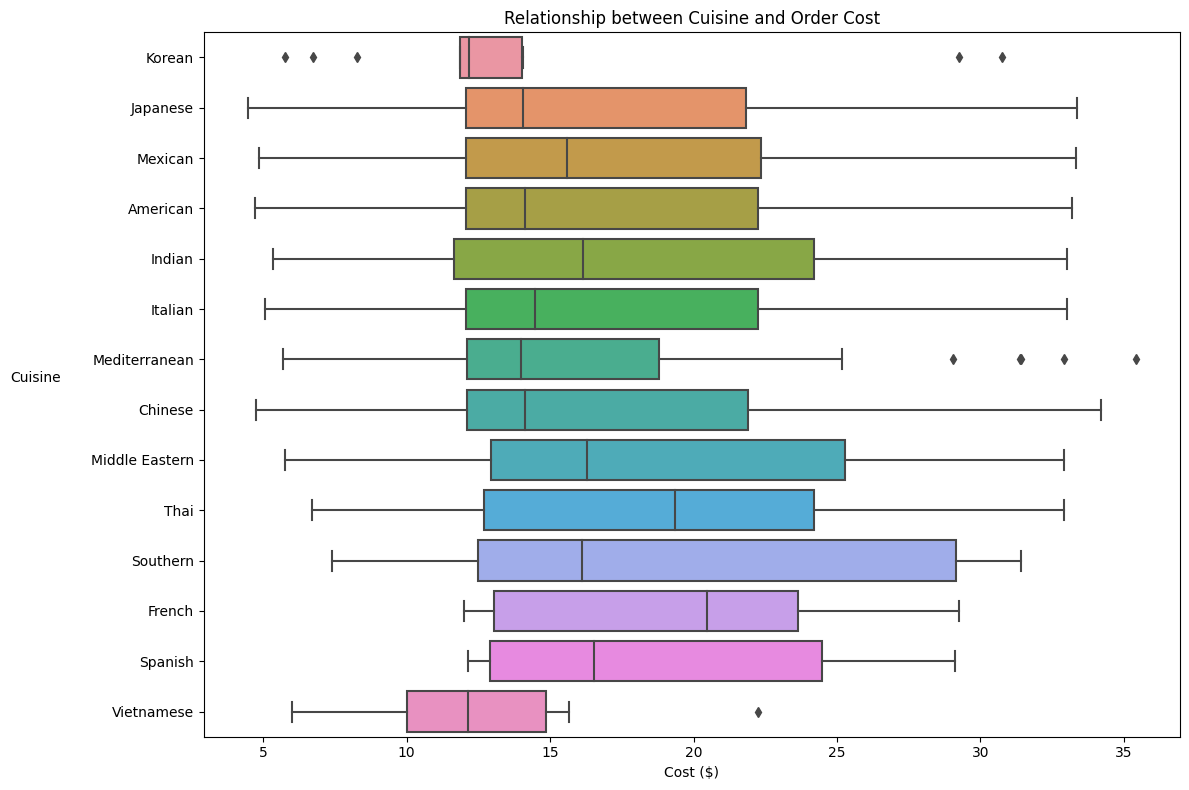

In [24]:
# Create box plots to demonstrate the relationship between Cuisine Type and Cost of the Order

plt.figure(figsize=(12, 8))

sns.boxplot(x='cost_of_the_order', y='cuisine_type', data=df)

plt.title('Relationship between Cuisine and Order Cost')
plt.xlabel('Cost ($)')
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots demonstrate the relationship between cuisine type on order cost. The **median cost for most cuisines is between \\$14 and \\$17** with **some medians (Vietnamese, Korean) closer to \\$13** and **other medians (French, Thai) closer to \\$20**.

The **majority of cuisines have comprable ranges**. According to this graph, **there are no specific cuisines that tend to cost significantly more than the others**. 

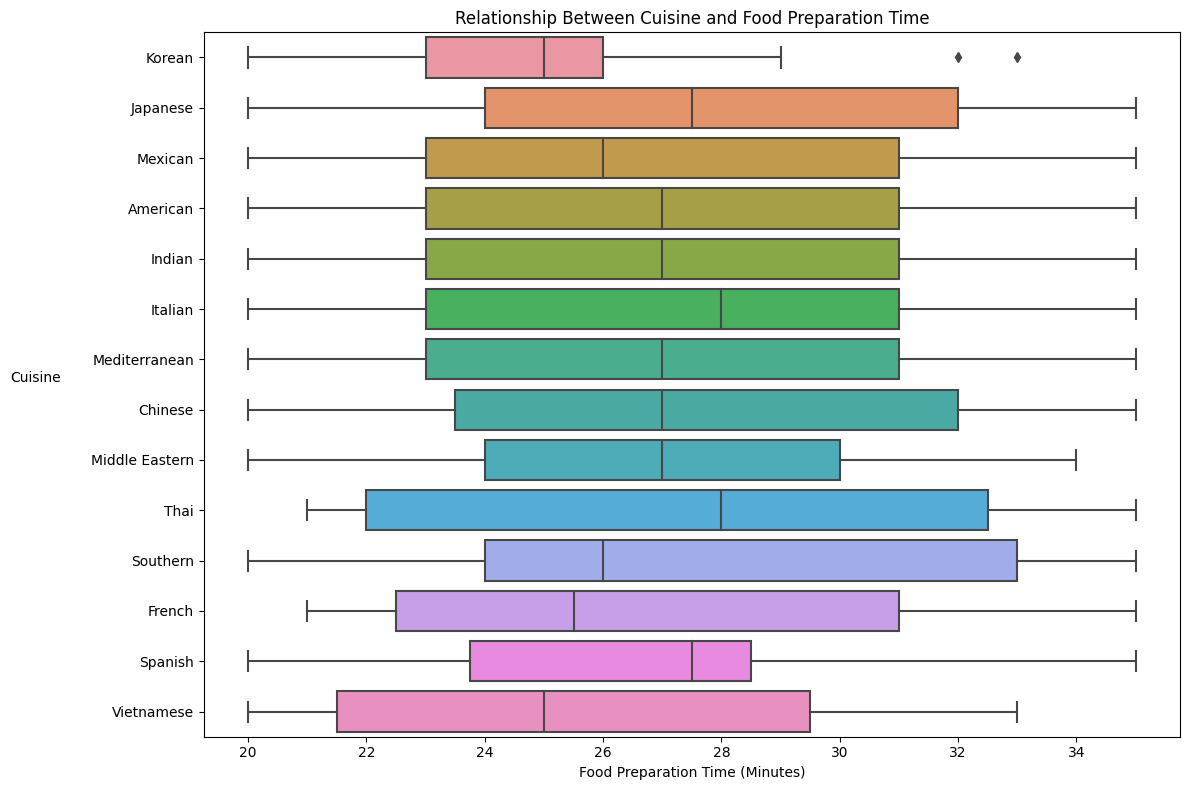

In [25]:
# Create box plots to demonstrate the relationship between Cuisine Type and Food Preparation Time

plt.figure(figsize=(12, 8))

sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df)

plt.title('Relationship Between Cuisine and Food Preparation Time')
plt.xlabel('Food Preparation Time (Minutes)')
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots demonstrate the relationship between cuisine type and food preparation time. The **average median food preparation time is near 27 minutes**. It appears as though **every cuisine type features similar food preparation times**. Vienamese and Korean food appear to have generally lower food preparation times but this can likely be attributed to the fact that these cuisine types have many less orders than other cuisines.

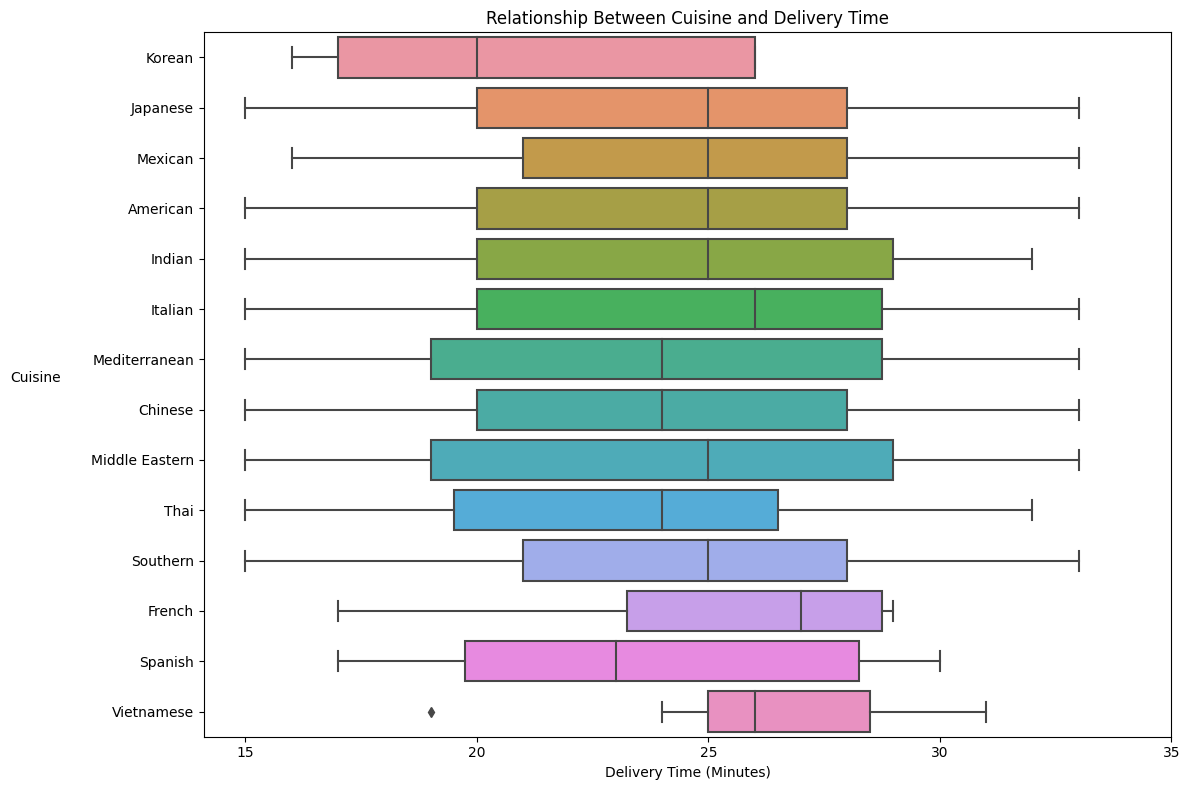

In [26]:
# Create box plots to demonstrate the relationship between Cuisine Type and Delivery Time

plt.figure(figsize=(12, 8))

sns.boxplot(x='delivery_time', y='cuisine_type', data=df)

plt.title('Relationship Between Cuisine and Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.xticks(ticks=[15, 20, 25, 30, 35], labels=[15, 20, 25, 30, 35]) # Display x-axis ticks closer to the "food_preparation_time" values to increase legibility15
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots demonstrate the relationship between cuisine type and delivery time. The **average median delivery time is near 25 minutes**. It appears as though **every cuisine type features similar delivery times**. Vietnamese and Korean food, in addition to French and Spanish food, appear to have greater variance in delivery times but this can, again, likely be attributed to the fact that these cuisine types have many less orders than other cuisines.

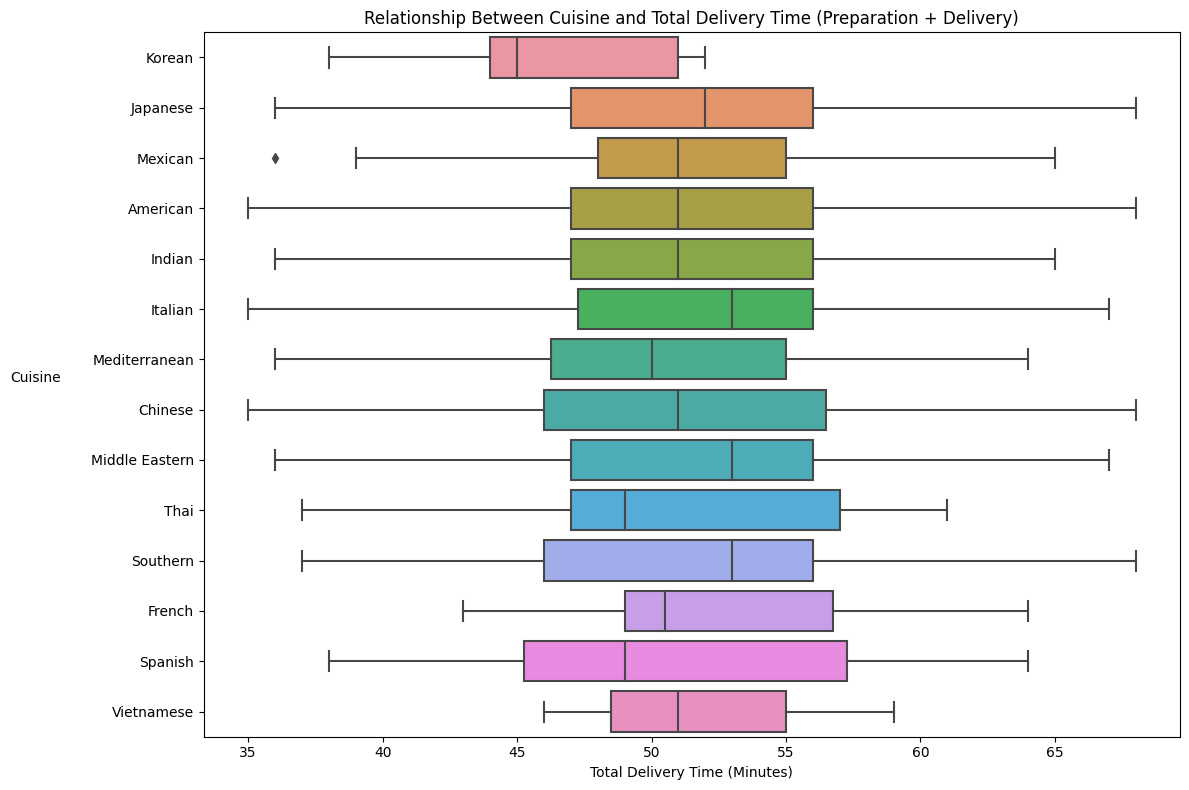

In [27]:
# Calculate the total time (food preparation time + delivery time)

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Create box plots to demonstrate the relationship between cuisine and total delivery time

plt.figure(figsize=(12, 8))

sns.boxplot(x='total_time', y='cuisine_type', data=df)

plt.title('Relationship Between Cuisine and Total Delivery Time (Preparation + Delivery)')
plt.xlabel('Total Delivery Time (Minutes)')
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots demonstrate the relationship between cuisine type and total delivery time (food preparation + delivery time). The **average median total delivery time is near 51 minutes**. It appears as though **every cuisine type features similar total delivery times**. Vietnamese and Korean food, in addition to French and Spanish food, appear to have greater variance in total delivery times but this can, again, likely be attributed to the fact that these cuisine types have many less orders than other cuisines.

This graph suggests that **no cuisine type is a true outlier in total delivery time**.

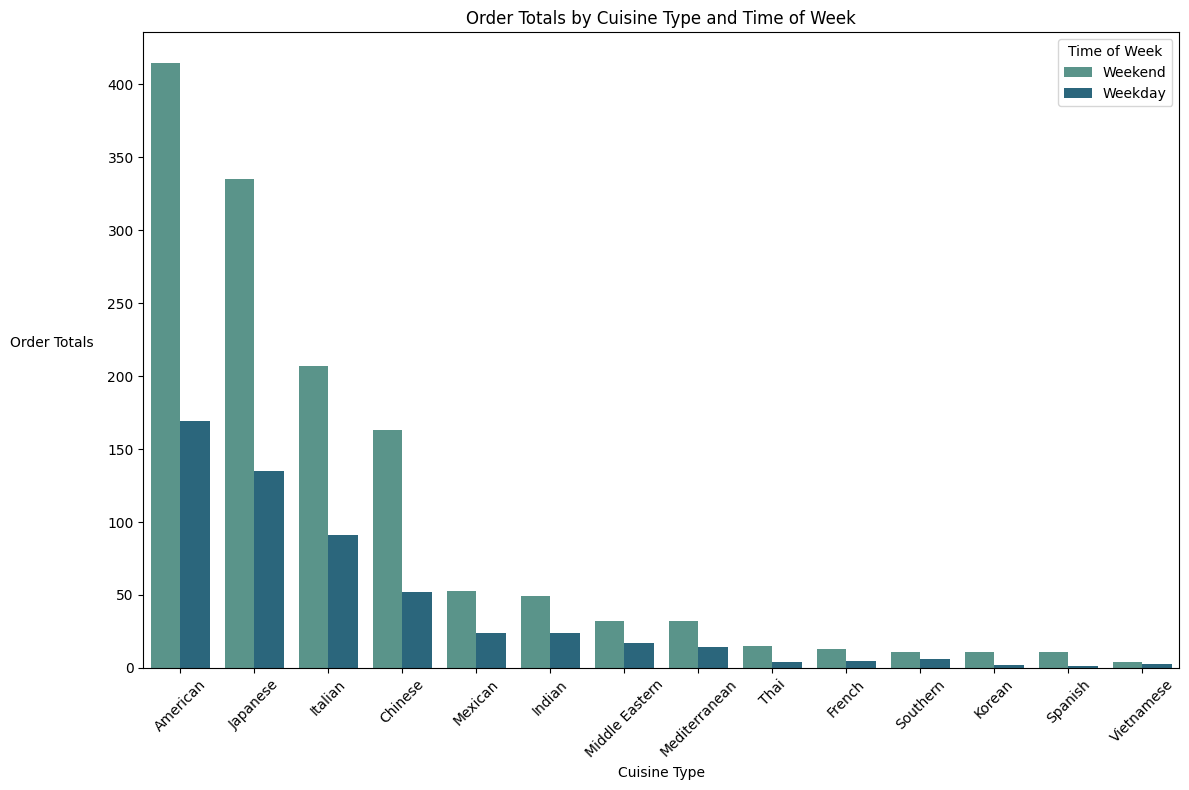

In [28]:
# Create a count plot with cuisine type on the x-axis and order count on the y-axis, separated by time of week

plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', order=df['cuisine_type'].value_counts().index, palette= "crest")

plt.title('Order Totals by Cuisine Type and Time of Week')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Order Totals', labelpad=40, rotation=0)
plt.legend(title='Time of Week')

plt.tight_layout()    
plt.show()

#### Observations:
This countplot demonstrates **consistently higher order totals for weekends over weekdays regardless of the cuisine type**.

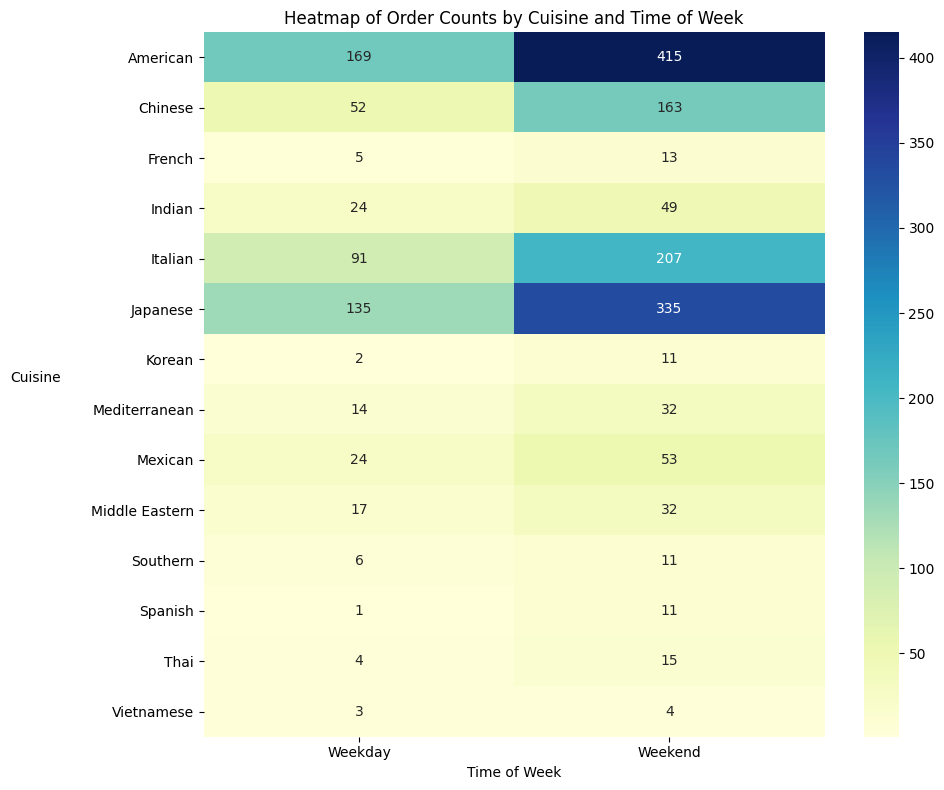

In [29]:
# Pivot the data to get the count of orders for each cuisine type by day of the week

pivot_table = df.pivot_table(index='cuisine_type', columns='day_of_the_week', aggfunc='size', fill_value=0)

# Create the heatmap

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")

heatmap.set_title('Heatmap of Order Counts by Cuisine and Time of Week')
plt.xlabel('Time of Week')
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
This heatmap visualizes the number of orders placed on weekdays and weekends by cuisine type. There is **no instance where any cuisine type has more orders on weekdays vs. weekends**.

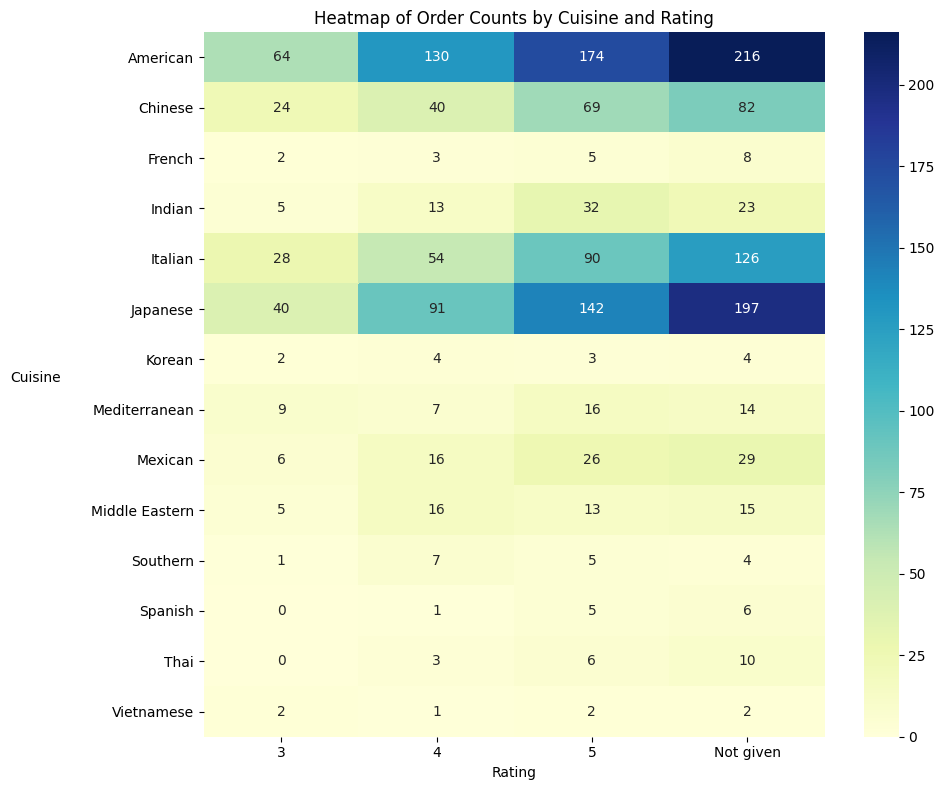

In [30]:
# Pivot the data to get the count of orders for each cuisine type by rating

pivot_table = df.pivot_table(index='cuisine_type', columns='rating', aggfunc='size', fill_value=0)

# Create the heatmap

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt="d")
heatmap.set_title('Heatmap of Order Counts by Cuisine and Rating')
plt.xlabel('Rating')
plt.ylabel('Cuisine', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
This heatmap visualizes the number of orders for different cuisine types by rating. The **majority of cuisines receive more ratings of 5 than any other rating**. **There are more "Not given" values than any other rating**. These ratings of "Not given" are included for visualization purposes. Imputing them as 4's would skew the distribution of ratings values too significantly to make any meaningful conclusions based on my findings.

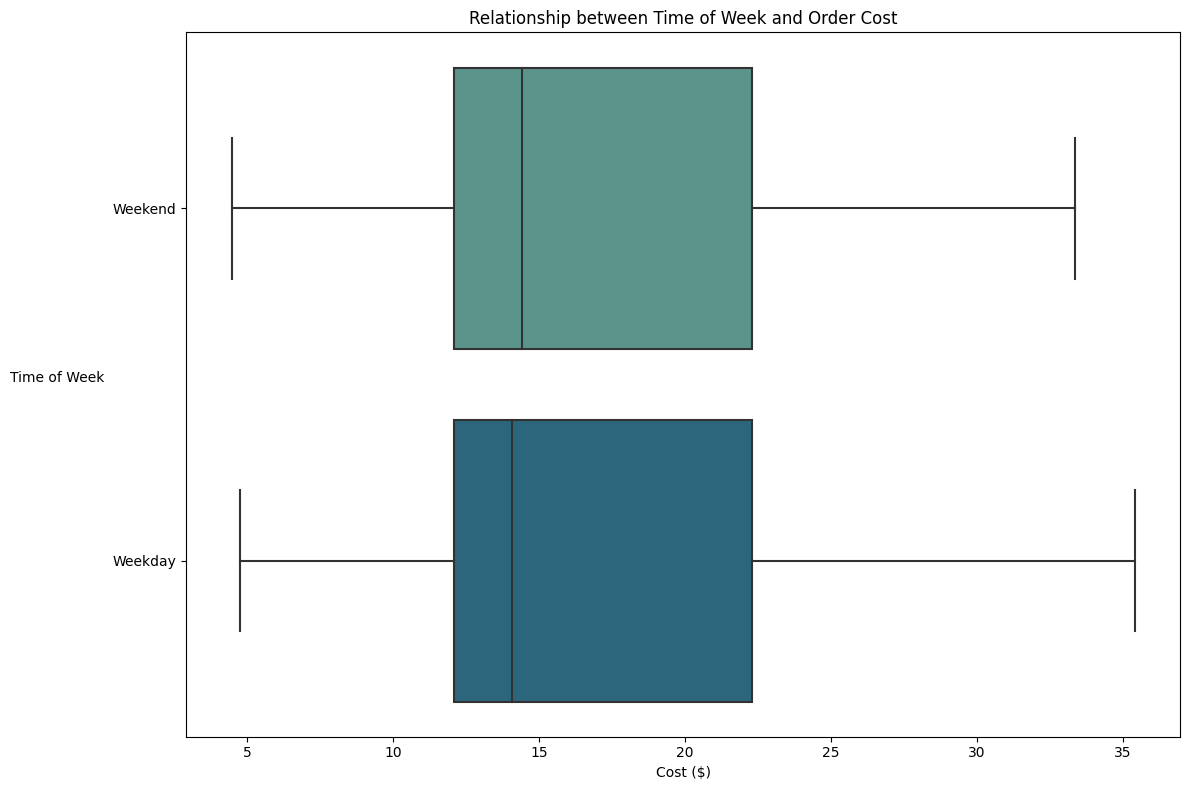

In [31]:
# Create box plots to demonstrate the relationship between Cuisine Type and Cost of the Order

plt.figure(figsize=(12, 8))

sns.boxplot(x='cost_of_the_order', y='day_of_the_week', data=df, palette="crest")

plt.title('Relationship between Time of Week and Order Cost')
plt.xlabel('Cost ($)')
plt.ylabel('Time of Week', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots suggest that **there is very little difference in the order costs between time of week**. The distribution of both box plots are nearly identical.

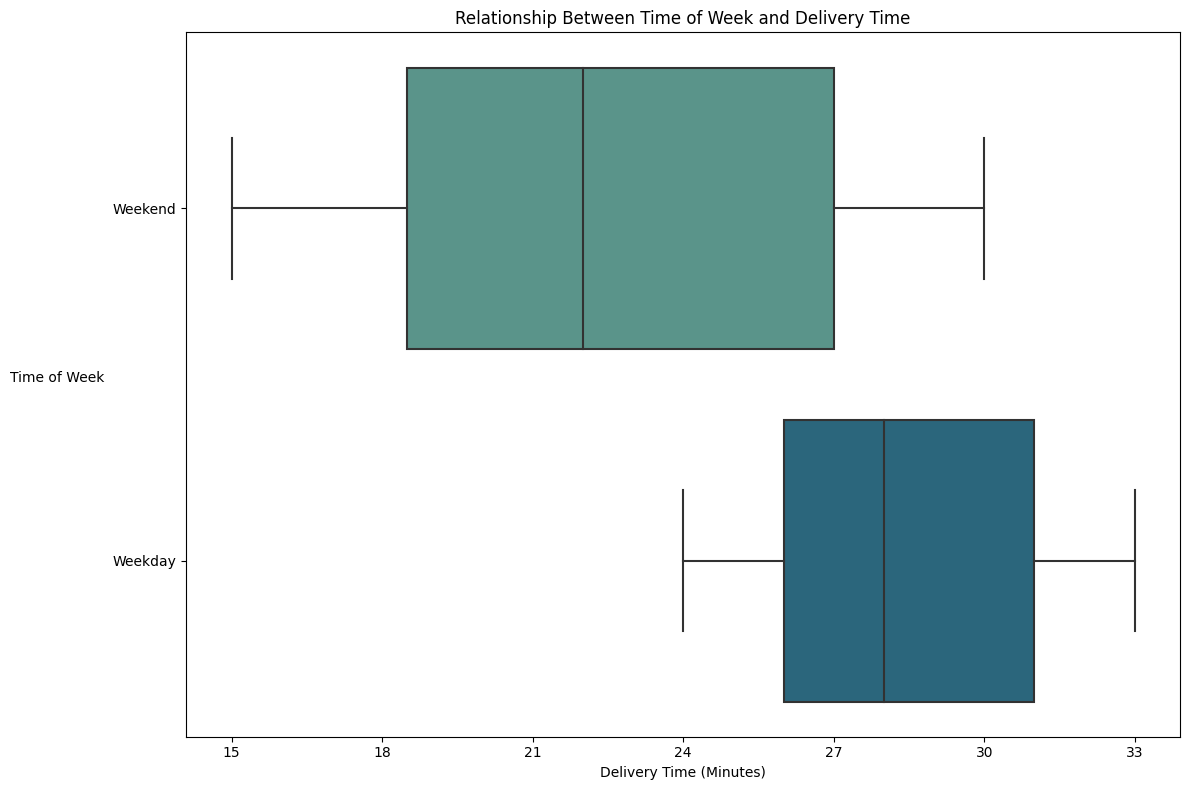

In [32]:
# Create box plots to demonstrate the relationship between time of week and delivery time

plt.figure(figsize=(12, 8))

sns.boxplot(x='delivery_time', y='day_of_the_week', data=df, palette="crest")

plt.title('Relationship Between Time of Week and Delivery Time')
plt.xlabel('Delivery Time (Minutes)')
plt.xticks(ticks=[15, 18, 21, 24, 27, 30, 33], labels=[15, 18, 21, 24, 27, 30, 33])
plt.ylabel('Time of Week', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots suggest that **orders placed on the weekend tend to be delivered faster**. The **median delivery time on the weekend is 22 minutes** while the **median delivery time on weekdays is 28 minutes**. The **left whisker (minimum delivery time) on weekdays indicates that 24 minutes is the lowest delivery time** in the sample set, **2 minutes slower than the median on weekend deliveries**. 

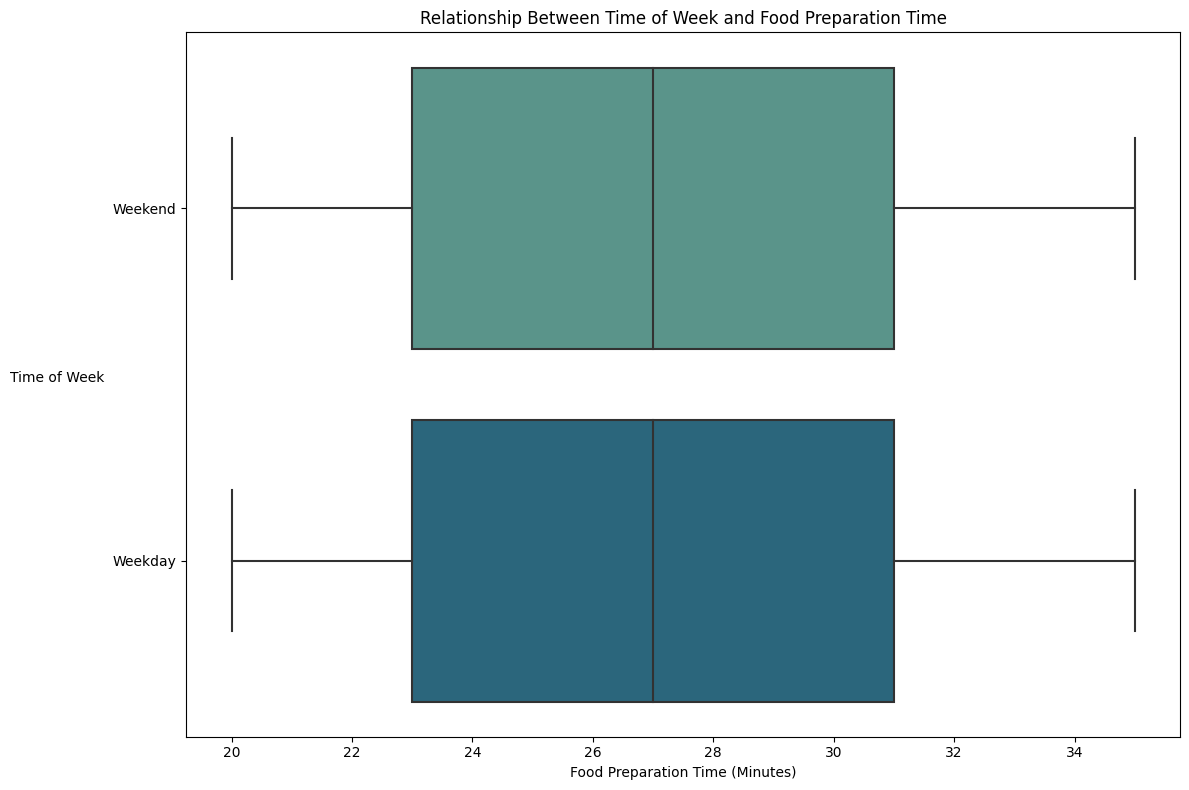

In [33]:
# Create box plots to demonstrate the relationship between time of week and food preparation time

plt.figure(figsize=(12, 8))

sns.boxplot(x='food_preparation_time', y='day_of_the_week', data=df, palette="crest")

plt.title('Relationship Between Time of Week and Food Preparation Time')
plt.xlabel('Food Preparation Time (Minutes)')
plt.ylabel('Time of Week', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
These box plots suggest that **food preparation time does not differ on weekends or weekdays**.

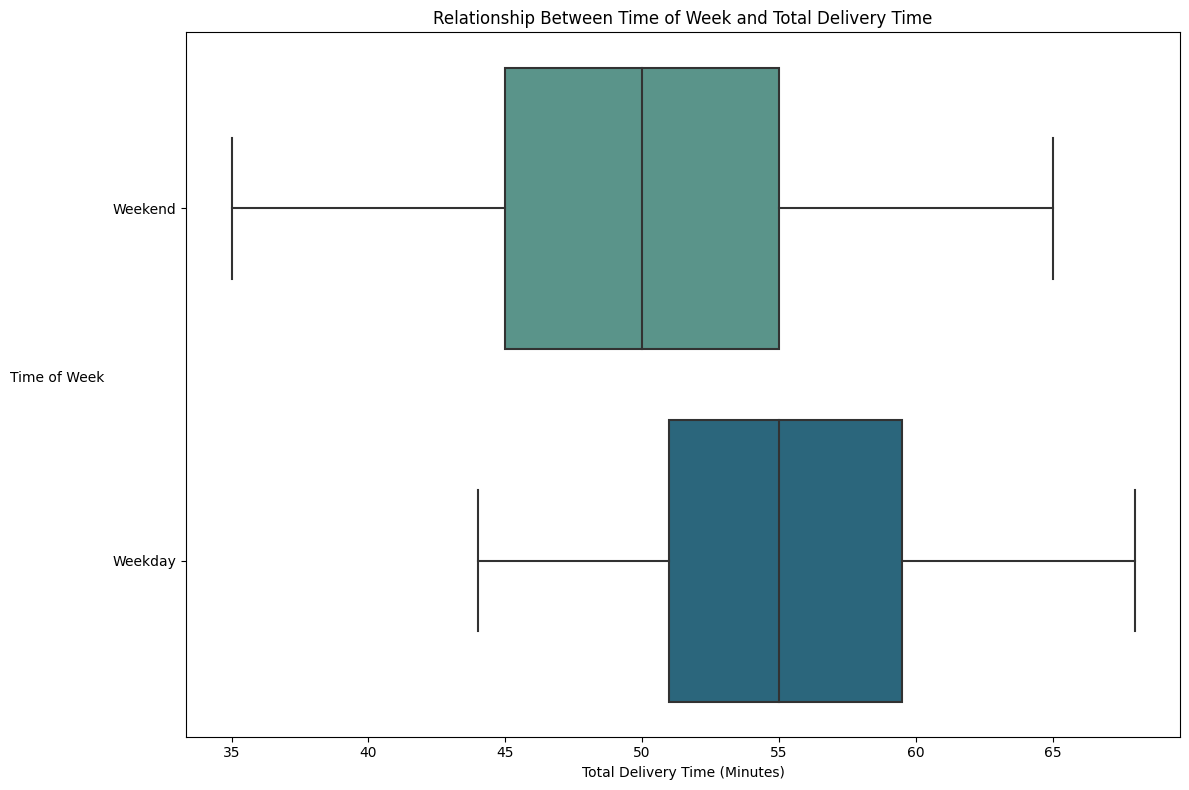

In [34]:
# Calculate the total time (food preparation time + delivery time)

df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Create box plots to demonstrate the relationship between time of week and total delivery time

plt.figure(figsize=(12, 8))

sns.boxplot(x='total_time', y='day_of_the_week', data=df, palette="crest")

plt.title('Relationship Between Time of Week and Total Delivery Time')
plt.xlabel('Total Delivery Time (Minutes)')
plt.ylabel('Time of Week', labelpad=40, rotation=0)

plt.tight_layout()
plt.show()

#### Observations:
The box plots suggest that the **total delivery time on weekends tends to be faster than on weekdays**. The **median total delivery time for weekends is 50 minutes** while the **median total delivery time for weekdays is 55 minutes**. 

This makes sense considering food preparation time is essentially the same for both times of week but the delivery time is typically faster on weekends.

In [35]:
# Filter out rows where rating is 'Not given' and convert the remaining ratings to float to prepare data

df_filtered_ratings = df[df['rating'] != 'Not given'].copy()
df_filtered_ratings['rating'] = df_filtered_ratings['rating'].astype(float)

# Calculate the count of filtered ratings for each restaurant using groupby and count functions

filtered_ratings_count = df_filtered_ratings.groupby('restaurant_name')['rating'].count()

# Identify restaurants with more than 50 filtered ratings using a > 50 condition

potential_restaurants = filtered_ratings_count[filtered_ratings_count > 50].index

# Filter the DataFrame to include only these restaurants

potential_restaurants = df_filtered_ratings[df_filtered_ratings['restaurant_name'].isin(potential_restaurants)]

# Calculate and display the average rating for each of these restaurants using the mean function

average_ratings = potential_restaurants.groupby('restaurant_name')['rating'].mean()

# Filter for restaurants with an average rating greater than 4 and display

eligible_restaurants = average_ratings[average_ratings > 4]
eligible_restaurants

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations:
By filtering rows with values of "Not given," converting the remaining ratings to floats, counting the filtered ratings for each restaurant, identifying restaurants with more than 50 ratings, filtering the DataFrame to include only these restaurants, calculating the average ratings of those restaurants, and displaying only the restaurants and their average ratings above 4, I have identified **The Meatball Shop** with a **4.51 average rating**, **Blue Ribbon Fried Chicken** with a **4.32 average rating**, **Shake Shack** with a **4.28 average rating**, and **Blue Ribbon Sushi** with a **4.22 average rating**.

In [36]:
# Define a function "adjust_cost" to apply specific parameters to the "cost_of_the_order" column

def adjust_cost(cost):
    if cost > 20:
        return cost * .25
    elif 5 < cost <= 20:
        return cost * .15
    else: # cost between 0 and 5
        return cost * 0

# Apply function adjust_cost() to each row in the "cost_of_the_order" column to create a new column "revenue"

df['revenue'] = df['cost_of_the_order'].apply(adjust_cost)

# Sum the values in the "revenue" column to determine "net_revenue"

net_revenue = df['revenue'].sum()

# Print the Net Revenue using a format specifier to output 2 decimal places

print(f"Net Revenue: ${net_revenue: .2f}")

Net Revenue: $ 6166.30


#### Observations:
**DoorDash** charges participating restaurants 25% on the orders costing greater than \\$20 and 15% on the orders costing greater than \\$5. By defining a new function "adjust_cost" that applies the parameters for the revenue generated by each order in the dataset and applying it to the "cost_of_the_order" column, I have determined that the **net revenue across all orders in this dataset is \\$6,166.30**.

In [37]:
# Sum "food_preparation_time" and "delivery_time" for each order in the DataFrame, add a > 60 condition to filter, divide using the len function, and mulitply by 100

percentage_over_60 = ((df['food_preparation_time'] + df['delivery_time'] > 60).sum() / len(df)) * 100

# Display result and round to 2 decimal places

print(f"Percentage of Orders Taking More Than 60 Minutes: {percentage_over_60:.2f}%")

Percentage of Orders Taking More Than 60 Minutes: 10.54%


#### Observations:
By summing the "food_preparation_time" and "delivery_time" for each order in the DataFrame, adding a greater than 60 condition, dividing by the total number of orders in the DataFrame using the len function, and multiplying by 100, I have determined that the **percentage of orders taking more than 60 minutes is 10.54%**.

In [38]:
# Group the data by "day_of_the_week" and calculate the mean "delivery_time" for "Weekday" and "Weekend"

mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the mean delivery time for 'Weekday' and 'Weekend'

print(mean_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
By using the groupby function on the "day_of_the_week" column and then applying the mean function on the "delivery_time" column, I was able to determine that the **mean delivery time on the weekend is 22 minutes** and the **mean delivery time on weekdays is 28 minutes**. The **mean delivery time varies by roughly 6 minutes with deliveries generally taking longer on weekdays**.

### Conclusions:
*  **American (584 orders)**, **Japanese (470 orders)**, **Italian (298 orders)**, and **Chinese (215 orders)** cuisines are **significantly more popular than the other 10 cuisines in our dataset** and make up the vast majority of total orders.

*  The **average order cost across all orders is \\$16.50**.

*  There are **significantly more orders placed during the weekend vs. weekdays (1,351 vs. 547)**.

*  There are **more "Not given" values in the "rating" column than any other individual value**. This makes gauging customer sentiment challenging.

*  Imputing the "Not given" values as 4's or 5's skews the ratings too intensely to make the imputation worthwhile.

*  The **majority of orders cost under \\$20**. 

*  The **average delivery time is 24 minutes**. **Delivery times tend to decrease on weekends and increase on weekdays**. Food preparation time stays virtually the same regardless of time of week.

*  The **average total delivery time (food preparation + delivery time) is roughly 52 minutes (51.53)** and follows the same trends as delivery time on weekends and weekdays.

*  There are no cuisine types that take noticeably longer to prepare or deliver.

### Recommendations:
*  It would be worthwhile to make an effort to improve the rating system in a number of ways. The ratings' heavy skew toward 4's and 5's in addition to a large field of "Not given" values may indicate that the metric is not actually representative of customer satisfaction.

*  Consider introducing a gamification element in-app to encourage more detailed and substantial rating gathering.

*  The net revenue is determined by fees charged on orders greater than \\$5 scaling upward. Could those 15% and 25% fees also be used to calculate a much smaller portion, say .5%, of that fee and apply it to customer accounts similar to credit card points?

*  Incentivizing effective, thoughtful rating through an in-app currency could increase rating participation while simultaneously driving users back to the platform again and again.

*  While building out means to increase effective ratings and information-gathering measures, **DoorDash** could also analyze more details about their most frequent customer's order habits (time of week, cuisine, specific restaurants, etc.)

*  A more robust and detailed rating platform could offer a great deal of insight into the customers on **DoorDash**.

*  **DoorDash** could offer coupons or other incentives during weekdays to drive up orders outside the weekend.